In [1]:
import pandas
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
# import dataframe
df = pandas.read_csv('NewКластеризация.csv', sep=";", index_col="Регион")
N_COLUMNS = len(df.columns)
N_ROWS = len(df.index)
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Среднемесячный размер социальной поддержки на одного пользователя,Количество преступлений на 100000 человек,Общая площадь жилых помещений,Процент населения с доходами ниже величины ПМ
Регион,,,,
Алтайский край,789.51,1634.5,56013.4,17.5
Амурская область,1156.47,2196.3,19864.9,15.9
Архангельская область,974.21,1715.9,31754.0,13.9
Архангельская область (без АО),962.37,1706.7,30652.0,13.5
Астраханская область,661.32,1319.6,24139.1,16.0
Белгородская область,583.21,849.3,47380.8,7.9
Брянская область,471.50,1179.8,35574.3,13.5
Владимирская область,727.65,1252.5,39346.4,13.0
Волгоградская область,476.67,1528.6,60501.9,14.4


In [3]:
# Normalizing dataframe
for i in range(N_COLUMNS):
    df.iloc[:, i] = ((df.iloc[:, i] - df.iloc[:, i].min()) / (df.iloc[:, i].max() - df.iloc[:, i].min()))

In [4]:
# KMeans simple
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

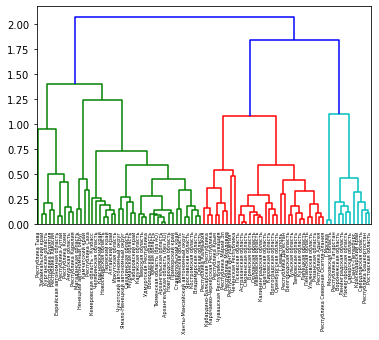

In [5]:
# Hierarchy
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
ac = AgglomerativeClustering(n_clusters=3).fit(df)

In [6]:
df["KMeans"] = kmeans.labels_
df["AC"] = ac.labels_
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.sort_values("AC"))
plt.show()

df.to_csv(path_or_buf="res.csv")

,Среднемесячный размер социальной поддержки на одного пользователя,Количество преступлений на 100000 человек,Общая площадь жилых помещений,Процент населения с доходами ниже величины ПМ,KMeans,AC
Регион,,,,,,
Алтайский край,0.334383,0.530419,0.228343,0.323529,1,0
Мурманская область,0.598568,0.518773,0.074537,0.179412,1,0
Ненецкий автономный округ,0.669806,0.648920,0.000000,0.144118,1,0
Новгородская область,0.337388,0.591145,0.074032,0.223529,1,0
Новосибирская область,0.253245,0.559156,0.281918,0.294118,1,0
Омская область,0.339861,0.431845,0.194872,0.217647,0,0
Ямало-Ненецкий автономный округ,0.455083,0.453360,0.041757,0.000000,1,0
Приморский край,0.347263,0.561198,0.177683,0.235294,1,0
Республика Алтай,0.417536,0.710364,0.014175,0.567647,1,0


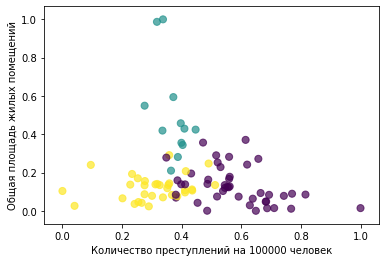

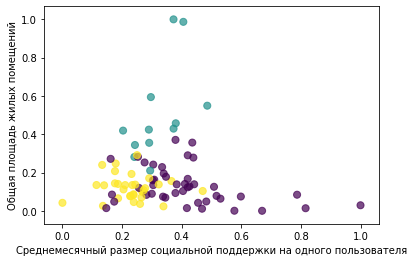

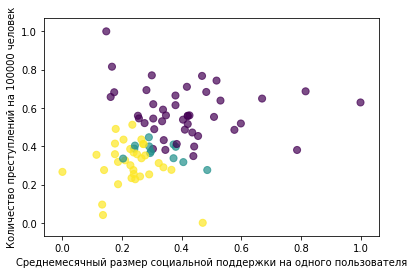

In [27]:
#pl = plt.scatter(df.iloc[:, 3], df["Количество преступлений на 100000 человек"], c= ac.labels_.astype(float), s=50, alpha=0.5)
#pl = plt.scatter(df["Количество преступлений на 100000 человек"], df["Общая площадь жилых помещений"], c=df["AC"])
pl1 = df.plot.scatter(x="Количество преступлений на 100000 человек", y="Общая площадь жилых помещений", c="AC", colorbar=False, s=50, colormap='viridis', alpha=0.7)
pl2 = df.plot.scatter(x="Среднемесячный размер социальной поддержки на одного пользователя", y="Общая площадь жилых помещений", c="AC", colorbar=False, s=50, colormap='viridis', alpha=0.7)
pl3 = df.plot.scatter(x="Среднемесячный размер социальной поддержки на одного пользователя", y="Количество преступлений на 100000 человек", c="AC", colorbar=False, s=50, colormap='viridis', alpha=0.7)